# Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds
Who's that doggy in the window?

Dogs are incredible. But have you ever been sitting at a cafe, seen a dog and not known what breed it is? I have. And then someone says, "it's an English Terrier" and you think, how did they know that?

In this project we're going to be using machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the [Kaggle dog breed identification competition](https://www.kaggle.com/c/dog-breed-identification/overview). It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

Multi-class image classification is an important problem because it's the same kind of technology Tesla uses in their self-driving cars or Airbnb uses in atuomatically adding information to their listings.

Since the most important step in a deep learng problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:

1. Get data ready (download from Kaggle, store, import).
2. Prepare the data (preprocessing, the 3 sets, X & y).
3. Choose and fit/train a model ([TensorFlow Hub](https://www.tensorflow.org/hub), tf.keras.applications, [TensorBoard](https://www.tensorflow.org/tensorboard), [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)).
4. Evaluating a model (making predictions, comparing them with the ground truth labels).
5. Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).

For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub.

The process of using a pretrained model and adapting it to your own problem is called transfer learning. We do this because rather than train our own model from scratch , we leverage the patterns of another model which has been trained to classify images.

# Getting our workspace ready

In [1]:
import tensorflow as tf


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow_hub as hub

In [4]:
from IPython.display import display, Image

In [5]:
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU not available :(


# Getting data ready
### Accessing the data

In [6]:
df=pd.read_csv("labels.csv")

In [7]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
df.describe()

,id,breed
count,10222,10222
unique,10222,120
top,f2039c11f872cbd5e01c2bbb959f7d45,scottish_deerhound
freq,1,126


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [10]:
df["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
komondor                 67
golden_retriever         67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<AxesSubplot:>

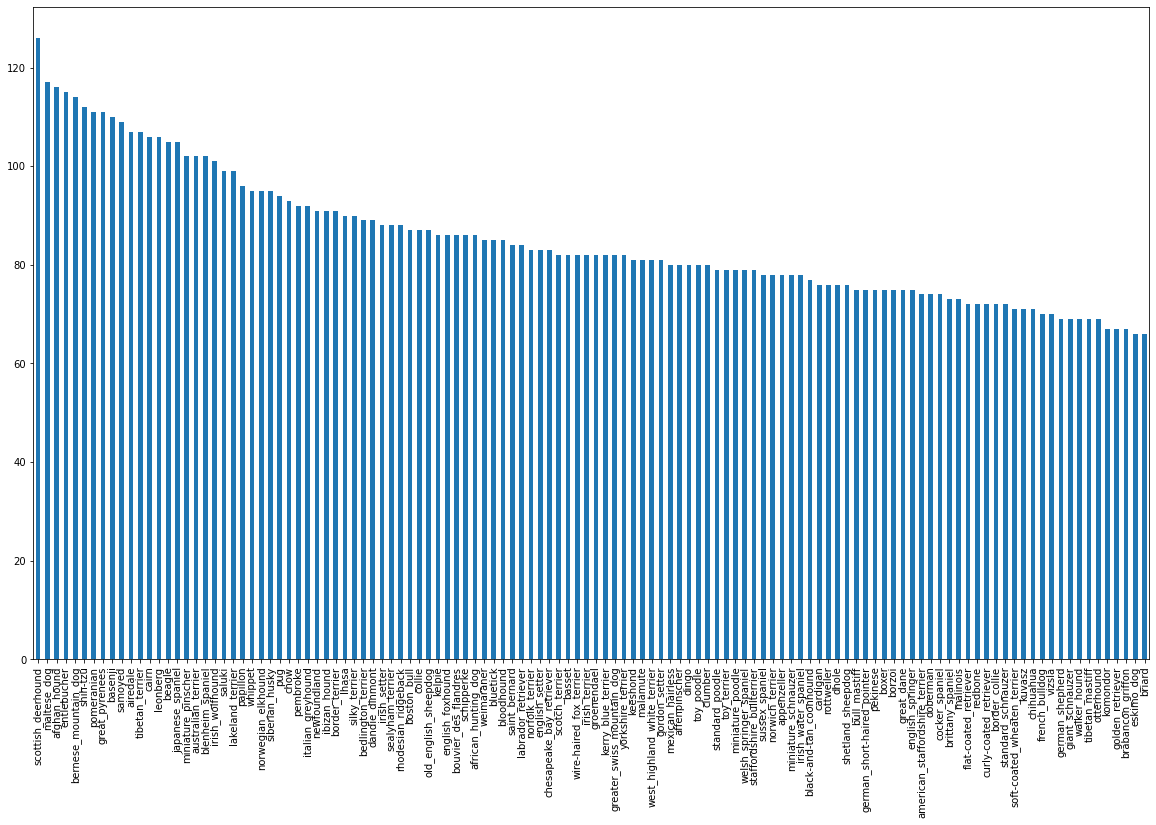

In [11]:
df["breed"].value_counts().plot.bar(figsize=(20,12))

In [12]:
from IPython.display import display, Image

## Getting images and their labels
Since we've got the image ID's and their labels in a DataFrame , we'll use it to create:

* A list a filepaths to training images
* An array of all labels
* An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.


In [13]:
# Create pathnames from image ID's
filenames = ["C:\\Users\\Vivek Kumar\\train\\" + fname + ".jpg" for fname in df["id"]]

# Check the first 10 filenames
filenames[:10]

['C:\\Users\\Vivek Kumar\\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'C:\\Users\\Vivek Kumar\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'C:\\Users\\Vivek Kumar\\train\\001cdf01b096e06d78e9e5112d419397.jpg',
 'C:\\Users\\Vivek Kumar\\train\\00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'C:\\Users\\Vivek Kumar\\train\\0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'C:\\Users\\Vivek Kumar\\train\\002211c81b498ef88e1b40b9abf84e1d.jpg',
 'C:\\Users\\Vivek Kumar\\train\\00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'C:\\Users\\Vivek Kumar\\train\\002a283a315af96eaea0e28e7163b21b.jpg',
 'C:\\Users\\Vivek Kumar\\train\\003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'C:\\Users\\Vivek Kumar\\train\\0042188c895a2f14ef64a918ed9c7b64.jpg']

In [14]:
import os
if len(os.listdir("C:\\Users\\Vivek Kumar\\train")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames do not match actual amount of files, check the target directory.


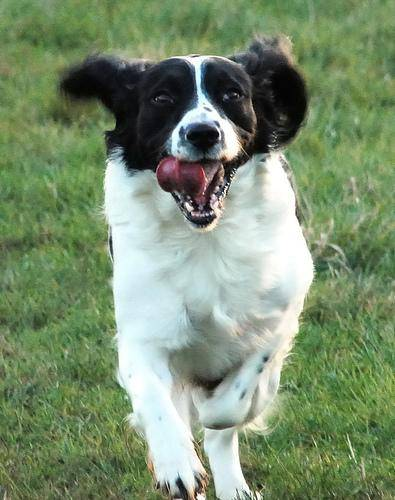

In [15]:
Image(filenames[1272])

In [16]:
labels = df["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [17]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")


Number of labels matches number of filenames!


In [18]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [19]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [20]:
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [21]:
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [22]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [23]:
print(labels[8])
print(boolean_labels[5].astype(int))

basenji
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


# Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to X (data) and our labels to y.

In [24]:
X = filenames
y = boolean_labels

In [25]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [26]:
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [27]:
X_train[:5], y_train[:2]

(['C:\\Users\\Vivek Kumar\\train\\00bee065dcec471f26394855c5c2f3de.jpg',
  'C:\\Users\\Vivek Kumar\\train\\0d2f9e12a2611d911d91a339074c8154.jpg',
  'C:\\Users\\Vivek Kumar\\train\\1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'C:\\Users\\Vivek Kumar\\train\\0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'C:\\Users\\Vivek Kumar\\train\\146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

# Preprocessing images (turning images into Tensors)

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers.Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

To preprocess our images into Tensors we're going to write a function which does a few things:

* Takes an image filename as input.
* Uses TensorFlow to read the file and save it to a variable, image.
* Turn our image (a jpeg file) into Tensors.
* Resize the image to be of shape (224, 224).
* Return the modified image.

In [28]:
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [29]:
tf.constant(image)[:2]


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [30]:
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

# Creating data batches

A batch (also called mini-batch) is a small portion of your data (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time.

In [31]:
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [32]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [33]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [34]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualizing data batches

In [35]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

To make computation efficient, a batch is a tighly wound collection of Tensors.


So to view data in a batch, we've got to unwind it.


We can do so by calling the as_numpy_iterator() method on a data batch.


This will turn our a data batch into something which can be iterated over.


Passing an iterable to next() will return the next item in the iterator.

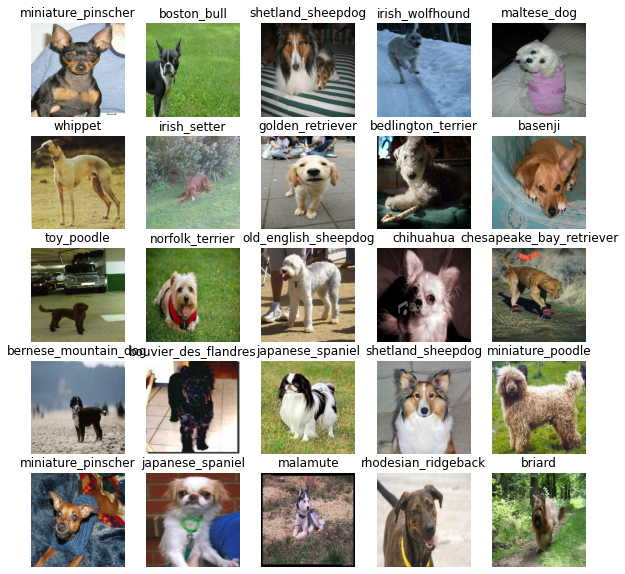

In [36]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

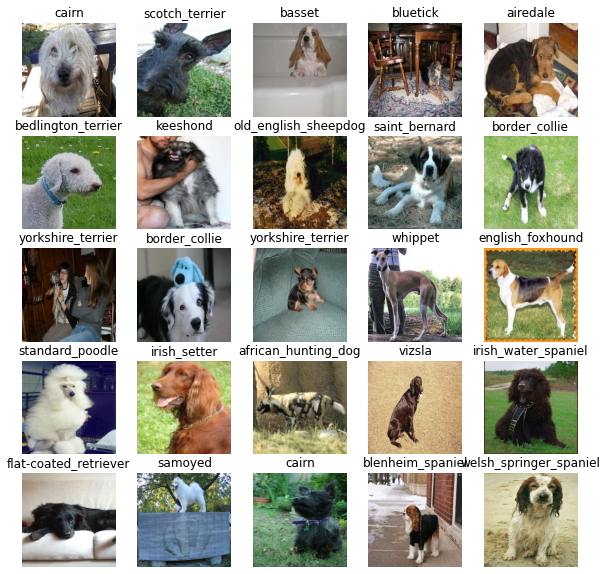

In [37]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

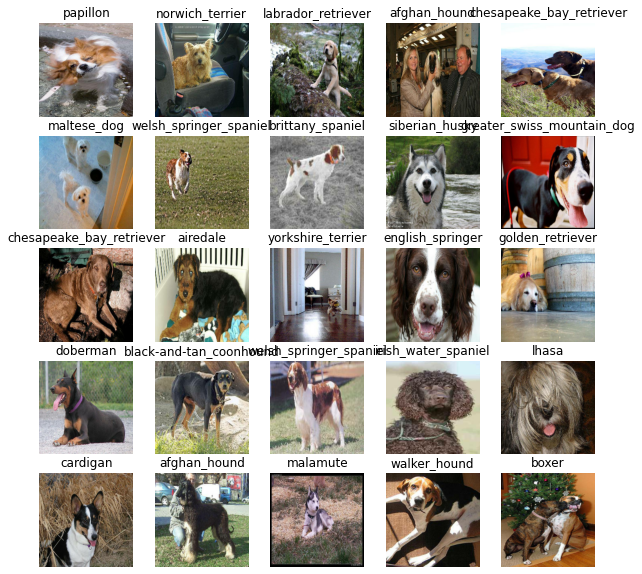

In [38]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

# Creating and training a model
Now our data is ready, let's prepare it modelling. We'll use an existing model from [TensorFlow Hub](https://tfhub.dev/).

Since we know our problem is image classification (classifying different dog breeds), we can navigate the [TensorFlow Hub page by our problem domain (image)](https://tfhub.dev/s?module-type=image-augmentation,image-classification,image-feature-vector,image-generator,image-object-detection,image-others,image-style-transfer,image-rnn-agent).

We start by choosing the image problem domain, and then can filter it down by subdomains, in our case, [image classification.](https://tfhub.dev/s?module-type=image-classification)

Clicking on the [mobilenet_v2_130_224](https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4) model, tells us this model takes an input of images in the shape 224, 224. It also says the model has been trained in the domain of image classification.

In [39]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

There are many ways of building a model in TensorFlow but one of the best ways to get started is to use the [Keras API.](https://www.tensorflow.org/guide/keras/sequential_model)


In [78]:
# Create a function which builds a Keras model
from tensorflow import keras
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, 
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting
  
  return model

In [41]:
# Create a model and check its details
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


# Creating callbacks

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

The two callbacks we're going to add are a TensorBoard callback and an Early Stopping callback.

In [42]:
%load_ext tensorboard
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("C:\\Users\\Vivek Kumar\\train\\log\\",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [43]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) 

# Training a model (on a subset of data)

Our first model is only going to be trained on 1000 images. Or trained on 800 images and then validated on 200 images

In [44]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

* Create a model using create_model().
* Setup a TensorBoard callback using create_tensorboard_callback()
* Call the fit() function on our model passing it the training data, validatation data, number of epochs to train for and the callbacks we'd like to use.
* Return the fitted model.

In [45]:
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1, # check validation metrics every epoch
            callbacks=[tensorboard, early_stopping])
  
  return model

In [46]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
 1/25 [>.............................] - ETA: 0s - loss: 5.9448 - accuracy: 0.0000e+00WARNING:tensorflow:From C:\Users\Vivek Kumar\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


25/25 [==============================] - 60s 2s/step - loss: 4.5905 - accuracy: 0.0887 - val_loss: 3.3790 - val_accuracy: 0.2800
Epoch 2/100
25/25 [==============================] - 57s 2s/step - loss: 1.6337 - accuracy: 0.6737 - val_loss: 2.1462 - val_accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 58s 2s/step - loss: 0.5598 - accuracy: 0.9375 - val_loss: 1.6403 - val_accuracy: 0.5600
Epoch 4/100
25/25 [==============================] - 57s 2s/step - loss: 0.2439 - accuracy: 0.9925 - val_loss: 1.4865 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 64s 3s/step - loss: 0.1446 - accuracy: 0.9962 - val_loss: 1.4056 - val_accuracy: 0.6150
Epoch 6/100
25/25 [==============================] - 62s 2s/step - loss: 0.0995 - accuracy: 1.0000 - val_loss: 1.3642 - val_accuracy: 0.6650
Epoch 7/100
25/25 [==============================] - 55s 2s/step - loss: 0.0746 - accuracy: 1.0000 - val_loss: 1.3306 - val_accuracy: 0.6600
Epoch 8/100
25/25 [======

In [62]:
%tensorboard --logdir "C:\\Users\\Vivek Kumar\\train\\log"


Reusing TensorBoard on port 6006 (pid 3632), started 0:01:09 ago. (Use '!kill 3632' to kill it.)

# Making and evaluating predictions using a trained model
Making predictions with a trained model is as calling predict() on it and passing it data in the same format the model was trained on.



In [48]:
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 10s 1s/step


array([[1.4791887e-03, 9.9319048e-05, 5.0647208e-04, ..., 1.3935882e-04,
        5.4381988e-05, 2.8769169e-03],
       [2.7588797e-03, 2.9819922e-03, 4.9546422e-03, ..., 8.0495980e-04,
        1.0895593e-03, 4.5353605e-04],
       [1.6978276e-05, 6.0096750e-04, 6.6203925e-06, ..., 3.9099206e-05,
        5.1398223e-05, 1.3877693e-04],
       ...,
       [1.3527418e-05, 1.5689887e-04, 6.1985949e-05, ..., 1.4568582e-04,
        1.4058090e-03, 3.5086348e-05],
       [1.9238470e-02, 5.5084517e-04, 1.4779133e-04, ..., 7.8441476e-04,
        6.3233296e-05, 2.0493714e-02],
       [9.8127162e-04, 5.8782822e-05, 6.6723633e-03, ..., 3.8057794e-03,
        2.9453536e-04, 1.5959503e-04]], dtype=float32)

In [49]:
predictions.shape

(200, 120)

In [50]:
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}")
print(f"Max index: {np.argmax(predictions[0])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") 

[1.47918868e-03 9.93190479e-05 5.06472075e-04 2.03934789e-04
 2.77138577e-04 9.50793674e-06 3.60237956e-02 7.32539862e-04
 4.30138083e-04 3.25366715e-03 8.37991363e-04 7.32564658e-05
 8.72345481e-05 7.47922822e-05 1.98470807e-04 7.29177147e-04
 7.50153704e-05 2.64747918e-01 6.66145061e-05 2.73700516e-05
 4.58185998e-04 3.28114576e-04 4.75496636e-05 2.71937414e-03
 4.65295307e-05 3.11110402e-04 2.60589331e-01 2.83452046e-05
 7.86510122e-04 8.01276110e-05 2.18904985e-04 1.97919644e-03
 8.54162441e-04 2.83682166e-05 1.86231581e-03 2.12587286e-02
 7.40500809e-06 4.32242232e-04 2.48581946e-05 8.54485843e-04
 5.24317613e-04 1.28112442e-04 6.27051850e-05 3.40313942e-04
 4.41303928e-05 3.67938155e-05 5.32474078e-05 3.94295872e-04
 2.81251152e-04 4.28892999e-05 1.40785603e-04 5.00575523e-04
 2.52911908e-04 4.24832324e-05 1.12738206e-04 2.31082649e-05
 2.47586489e-04 7.87861831e-03 2.64542818e-04 6.11521192e-02
 2.03484274e-03 3.16151491e-05 1.50856795e-03 6.78095239e-05
 2.88284617e-04 4.048240

In [51]:
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[175])
pred_label

'shih-tzu'

Since our validation data (val_data) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (using unbatch()) and then turn it into an iterator using as_numpy_iterator().



In [52]:
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

The first function we'll create will:

* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [53]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

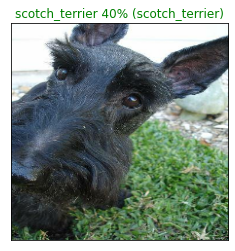

In [54]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)

Let's build a function to demonstrate. The function will:

* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().
* Find the top 10:
* Prediction probabilities indexes
* Prediction probabilities values
* Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [55]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

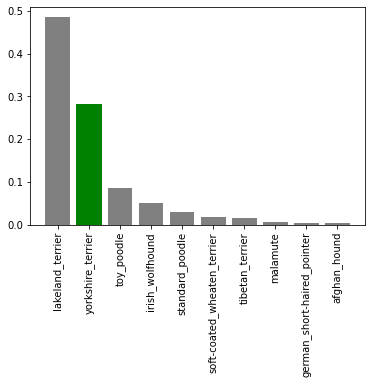

In [56]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=10)

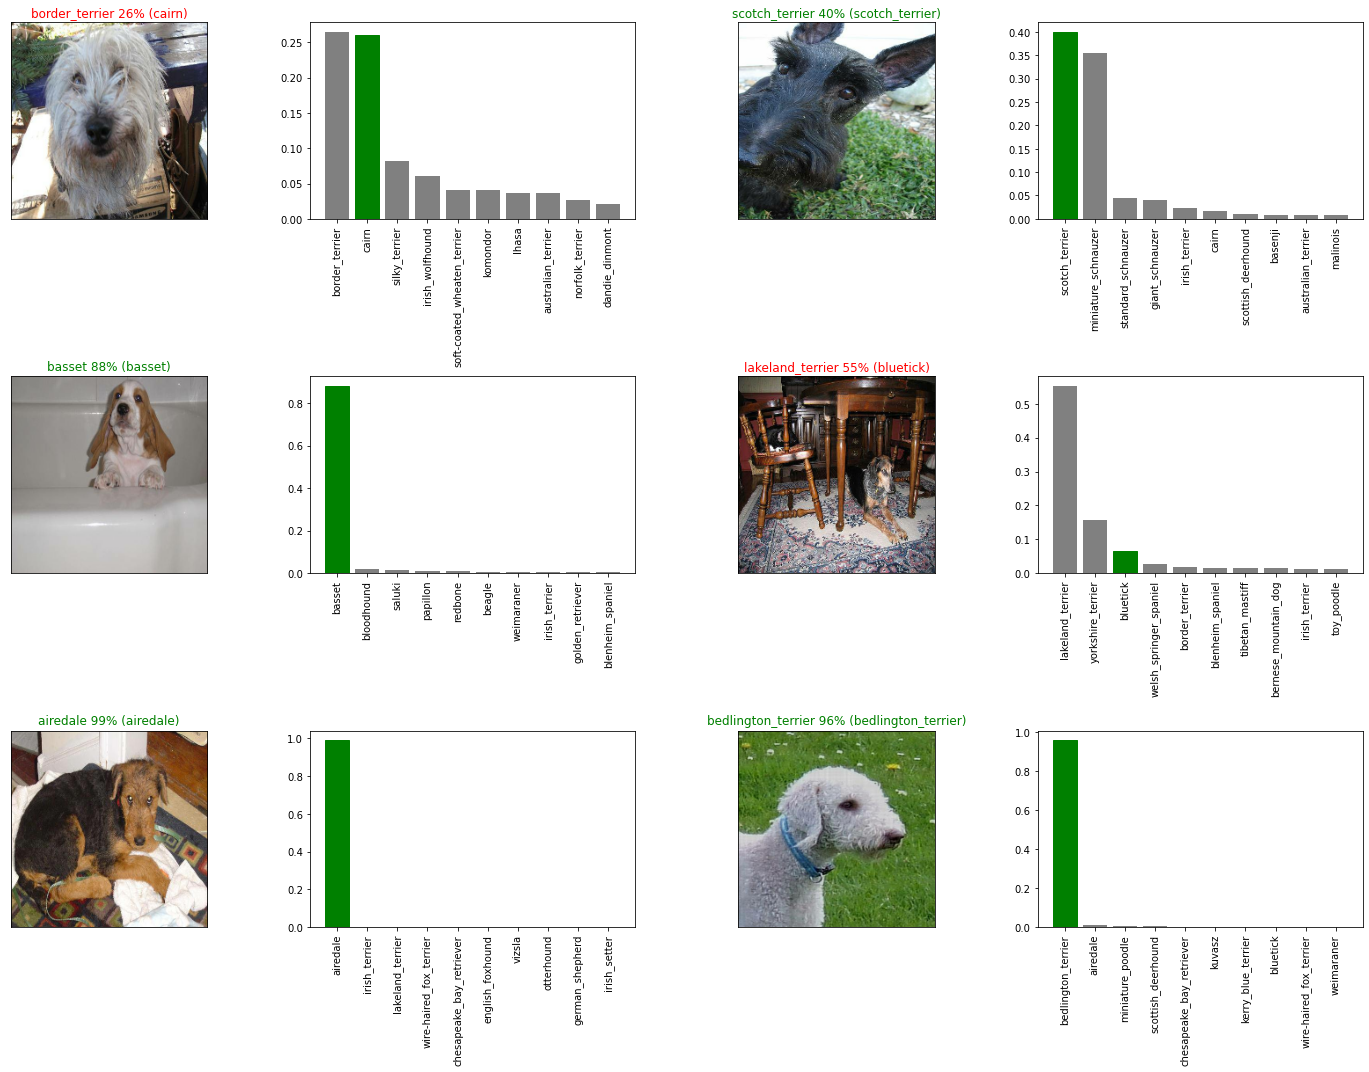

In [57]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [68]:

def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("C:\\Users\\Vivek Kumar\\save\\",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [69]:

def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model


# Training a model (on the full data)

In [72]:
len(X), len(y)

(10222, 10222)

We've got over 10,000 images and labels in our training set.

Before we can train a model on these, we'll have to turn them into a data batch.

In [73]:
full_data = create_data_batches(X, y)


Creating training data batches...


In [74]:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Since we've made a new model instance, full_model, we'll need some callbacks too.

In [75]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [76]:
%tensorboard --logdir "C:\\Users\\Vivek Kumar\\train\\log"


Reusing TensorBoard on port 6006 (pid 3632), started 0:09:19 ago. (Use '!kill 3632' to kill it.)

Since running the cell below will cause the model to train on all of the data (10,000+) images, it may take a fairly long time to get started and finish.

In [80]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
  2/320 [..............................] - ETA: 36:05 - loss: 5.6675 - accuracy: 0.0000e+00WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 1.8392s vs `on_train_batch_end` time: 11.7719s). Check your callbacks.


320/320 [==============================] - 589s 2s/step - loss: 1.3439 - accuracy: 0.6654
Epoch 2/100
320/320 [==============================] - 590s 2s/step - loss: 0.4013 - accuracy: 0.8816
Epoch 3/100
320/320 [==============================] - 588s 2s/step - loss: 0.2356 - accuracy: 0.9374
Epoch 4/100
320/320 [==============================] - 621s 2s/step - loss: 0.1568 - accuracy: 0.9615
Epoch 5/100
320/320 [==============================] - 581s 2s/step - loss: 0.1064 - accuracy: 0.9783
Epoch 6/100
320/320 [==============================] - 584s 2s/step - loss: 0.0771 - accuracy: 0.9870
Epoch 7/100
320/320 [==============================] - 552s 2s/step - loss: 0.0582 - accuracy: 0.9917
Epoch 8/100
320/320 [==============================] - 564s 2s/step - loss: 0.0452 - accuracy: 0.9944
Epoch 9/100
320/320 [==============================] - 555s 2s/step - loss: 0.0373 - accuracy: 0.9964
Epoch 10/100
320/320 [==============================] - 552s 2s/step - loss: 0.0304 - accuracy

# Making predictions on the test dataset

To make predictions on the test data, we'll:

* Get the test image filenames.
* Convert the filenames into test data batches using create_data_batches() and setting the test_data parameter to True (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the predict() function.

In [81]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "C:\\Users\\Vivek Kumar\\test\\"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['C:\\Users\\Vivek Kumar\\test\\000621fb3cbb32d8935728e48679680e.jpg',
 'C:\\Users\\Vivek Kumar\\test\\00102ee9d8eb90812350685311fe5890.jpg',
 'C:\\Users\\Vivek Kumar\\test\\0012a730dfa437f5f3613fb75efcd4ce.jpg',
 'C:\\Users\\Vivek Kumar\\test\\001510bc8570bbeee98c8d80c8a95ec1.jpg',
 'C:\\Users\\Vivek Kumar\\test\\001a5f3114548acdefa3d4da05474c2e.jpg',
 'C:\\Users\\Vivek Kumar\\test\\00225dcd3e4d2410dd53239f95c0352f.jpg',
 'C:\\Users\\Vivek Kumar\\test\\002c2a3117c2193b4d26400ce431eebd.jpg',
 'C:\\Users\\Vivek Kumar\\test\\002c58d413a521ae8d1a5daeb35fc803.jpg',
 'C:\\Users\\Vivek Kumar\\test\\002f80396f1e3db687c5932d7978b196.jpg',
 'C:\\Users\\Vivek Kumar\\test\\0036c6bcec6031be9e62a257b1c3c442.jpg']

In [82]:
len(test_filenames)

10357

In [83]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [85]:
test_predictions = model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 579s 2s/step


In [86]:
test_predictions = full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 559s 2s/step


In [87]:
test_predictions[:10]

array([[2.35168634e-12, 1.11414697e-12, 5.48682956e-15, ...,
        4.46033574e-15, 7.49754842e-11, 4.27297434e-12],
       [1.87067826e-06, 8.10039637e-07, 2.00455936e-08, ...,
        1.47563628e-11, 7.10007413e-08, 2.16083995e-09],
       [5.15352795e-11, 4.50742164e-06, 2.89777069e-09, ...,
        2.24840164e-07, 3.29380218e-10, 1.01144350e-10],
       ...,
       [1.69711112e-09, 8.75679459e-11, 7.27856317e-11, ...,
        1.38115864e-12, 2.04236498e-12, 1.20168583e-10],
       [7.32207697e-12, 2.40908027e-09, 2.07587267e-10, ...,
        1.71622816e-07, 2.84628343e-09, 3.16516917e-11],
       [1.19827193e-09, 1.09844425e-11, 2.46177956e-11, ...,
        1.03918848e-12, 6.54872207e-12, 6.22170759e-08]], dtype=float32)

# Preparing test dataset predictions for Kaggle

Looking at the [Kaggle sample](https://www.kaggle.com/c/dog-breed-identification/overview/evaluation) submission, it looks like they want the models output probabilities each for label along with the image ID's.

To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each dog breed.
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns using the unique_breeds list and the test_predictions list.
* Export the DataFrame as a CSV to submit it to Kaggle.

In [88]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [90]:
test_path = "C:\\Users\\Vivek Kumar\\test\\"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00102ee9d8eb90812350685311fe5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012a730dfa437f5f3613fb75efcd4ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001510bc8570bbeee98c8d80c8a95ec1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001a5f3114548acdefa3d4da05474c2e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00102ee9d8eb90812350685311fe5890,0.000002,0.000001,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000003,0.0,0.0,0.000288,0.0,0.0,0.0
2,0012a730dfa437f5f3613fb75efcd4ce,0.0,0.000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001510bc8570bbeee98c8d80c8a95ec1,0.000007,0.000002,0.0,0.000001,0.000015,0.000001,0.0,0.0,0.0,...,0.0,0.0,0.000002,0.0,0.000001,0.0,0.0,0.00098,0.0,0.0
4,001a5f3114548acdefa3d4da05474c2e,0.00004,0.000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
